In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
y = df["koi_disposition"]
target_names = ["CANDIDATE", "FALSE POSITIVE", "NOT DISPOSITIONED","CONFIRMED"]

In [4]:
X = df[['koi_fpflag_nt',
'koi_fpflag_ss',
'koi_fpflag_co',
'koi_fpflag_ec',
'koi_period',
'koi_time0bk',
'koi_impact',
'koi_duration',
'koi_depth',
'koi_prad',
'koi_teq',
'koi_insol',
'koi_model_snr',
'koi_steff',
'koi_slogg',
'koi_srad',
'ra',
'dec',
'koi_kepmag'
]]
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,5455,4.467,0.927,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,5853,4.544,0.868,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,5805,4.564,0.791,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,6031,4.438,1.046,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,6046,4.486,0.972,296.28613,48.224670,15.714


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.792
k: 3, Train/Test Score: 0.897/0.803
k: 5, Train/Test Score: 0.876/0.804
k: 7, Train/Test Score: 0.858/0.805
k: 9, Train/Test Score: 0.845/0.805
k: 11, Train/Test Score: 0.840/0.802
k: 13, Train/Test Score: 0.840/0.804
k: 15, Train/Test Score: 0.838/0.807
k: 17, Train/Test Score: 0.831/0.802
k: 19, Train/Test Score: 0.826/0.801


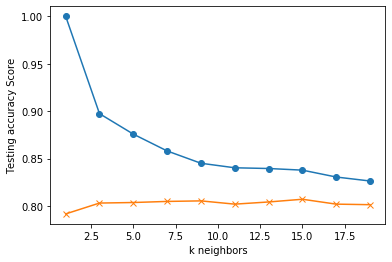

In [8]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.804
